In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import joblib
import tkinter as tk
from tkinter import ttk

In [2]:
# reading the data from file into dataframe. 
# as dataset is in .tsv format, telling that it is in tab seperated formate

data = pd.read_csv(r'D:\PROJECT\05-NATURAL LANGUAGE PROCESSING\SENTIMENT ANALYSIS\data\Restaurant_Reviews.tsv', sep='\t')

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# checking number of rows and columns in this dataset
data.shape

(1000, 2)

In [5]:
# checking number of null values
data.isnull().sum() 

Review    0
Liked     0
dtype: int64

In [6]:
# checking how many liked reviews to check if dataset is balaced or not
data.Liked.value_counts() 

Liked
1    500
0    500
Name: count, dtype: int64

In [7]:
# applying 'len' function to count number of characters for each review
data['Char_Count'] = data['Review'].apply(len) 

In [8]:
# applying lambda function to count words for reach review

data['Word_Count'] = data['Review'].apply(lambda x:len(str(x).split()))

In [9]:
# obtaining necessary files and data for nltk to perform sentence tokenization

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
# counting sentences in each review
data['Sentence_Count']= data['Review'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

In [11]:
data.head()

,Review,Liked,Char_Count,Word_Count,Sentence_Count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [12]:
 # calculate average of character count for positive and negative reviews

data[data['Liked'] == 1]['Char_Count'].mean()

55.88

In [13]:
data[data['Liked'] == 0]['Char_Count'].mean()

60.75

In [14]:

custom_stopwords = {
    "no", "nor", "not", "isn", "isn't", "don", "don't", "ain", "ain't", "aren", "aren't", "couldn", "couldn't", 
    "didn", "didn't", "doesn", "doesn't", "hadn", "hadn't", "haven", "haven't", "ma", "mightn", "mightn't", 
    "mustn", "mustn't", "needn", "needn't", "shan", "shan't", "shouldn", "shouldn't", 
    "weren", "weren't", "won", "won't", "wouldn", "wouldn't"
}
# NLP Preprocessing
ps = PorterStemmer()
stopwords = set(stopwords.words('english')) - custom_stopwords

corpus = []
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i]) # Remove non-letter chars
    review = review.lower().split()  # Lowercase and tokenize
    review= [ps.stem(word) for word in review if word not in stopwords]
    review = " ".join(review)
    corpus.append(review)

In [15]:
data['Processed_Text'] = corpus

In [16]:
data.head()

,Review,Liked,Char_Count,Word_Count,Sentence_Count,Processed_Text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [17]:
# Create a word cloud image
wc = WordCloud(
    width=800,
    height=400,
    min_font_size=0,
    background_color='white'
)

In [18]:
positive = wc.generate(data[data['Liked']==1]['Processed_Text'].str.cat(sep=" "))

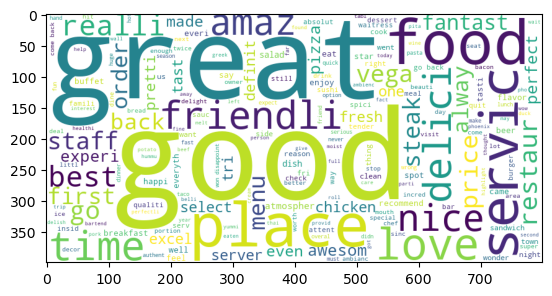

In [19]:
plt.imshow(positive)

In [20]:
negative = wc.generate(data[data['Liked']==0]['Processed_Text'].str.cat(sep=" "))

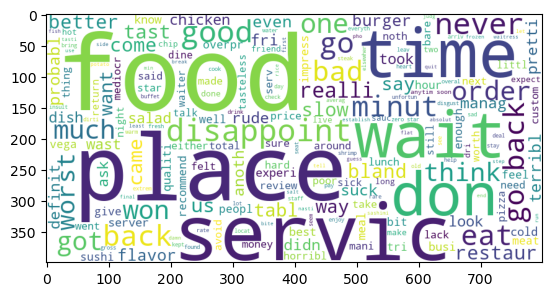

In [21]:
plt.imshow(negative)

In [22]:
# Convert text to feature vectors
cv = CountVectorizer(max_features= 1500)

In [23]:
X = cv.fit_transform(corpus).toarray()

In [24]:
y = data['Liked']

In [25]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

In [26]:
# Train model
np = GaussianNB()
np.fit(X_train, y_train)
y_pred = np.predict(X_test)
accuracy_score(y_test, y_pred)

0.675

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test) # Predict
accuracy_score(y_test, y_pred) # Evaluate

0.785

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.77

In [29]:
joblib.dump(rf, "Restaurant_Review_Model.pkl")
joblib.dump(cv, 'Count_Vectorizer.pkl')

['Count_Vectorizer.pkl']